# IMPORTING LIBRARIES

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
df = pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [11]:
# Drop irrelevant columns
df.drop(['FIRST NAME', 'LAST NAME', 'SEX', 'LEAVES USED', 'LEAVES REMAINING'], axis=1, inplace=True)


In [12]:
df.isnull().sum()

DOJ             1
CURRENT DATE    0
DESIGNATION     0
AGE             3
SALARY          0
UNIT            0
RATINGS         2
PAST EXP        0
dtype: int64

# Exploratory Data Analysis (EDA)

In [13]:
df.describe()

,AGE,SALARY,RATINGS,PAST EXP
count,2636.000000,2639.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,3.486159,1.566881
std,3.908228,36876.956944,1.114933,2.728416
min,21.000000,40001.000000,2.000000,0.000000
25%,22.000000,43418.000000,2.000000,0.000000
50%,24.000000,46781.000000,3.000000,1.000000
75%,25.000000,51401.500000,4.000000,2.000000
max,45.000000,388112.000000,5.000000,23.000000


# Distribution of salary

# Correlation heatmap

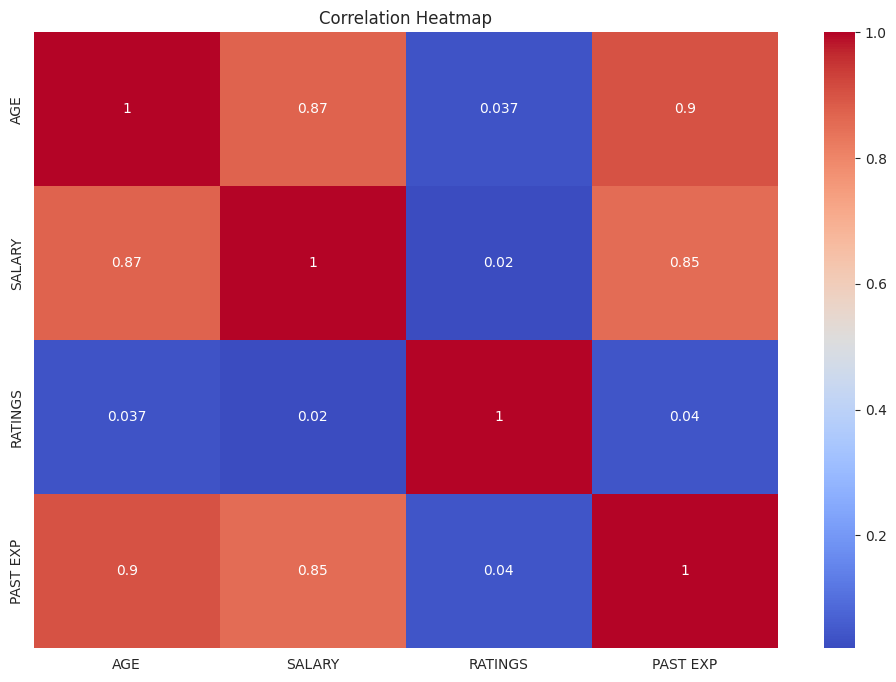

In [14]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

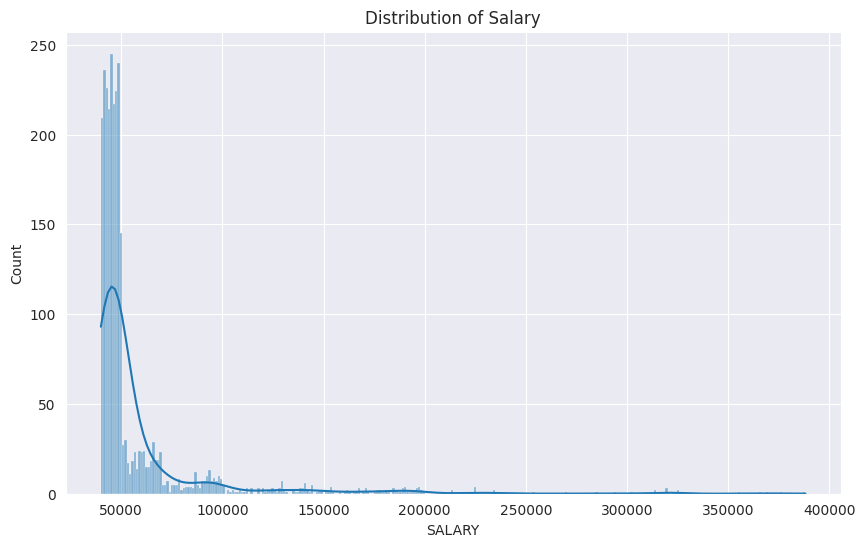

In [15]:
# Distribution of Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], kde=True)
plt.title('Distribution of Salary')
plt.show()


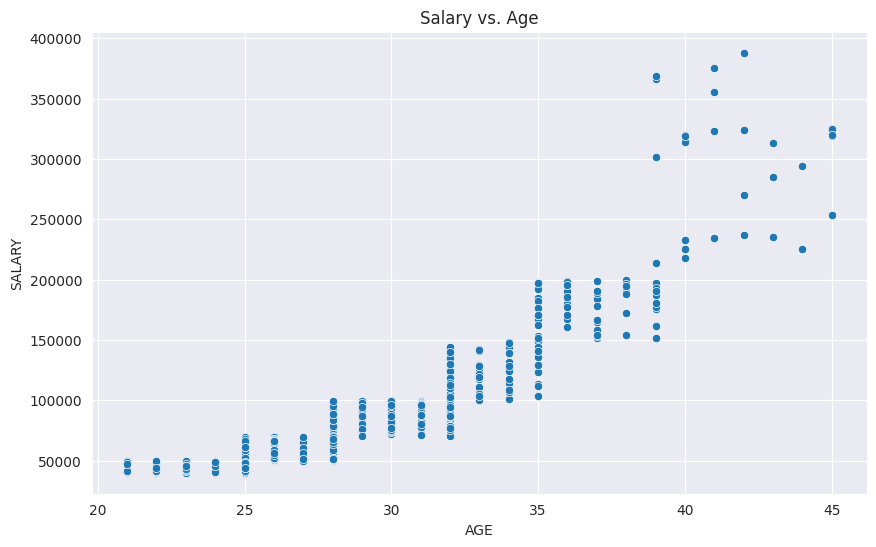

In [16]:

# Scatter plot of Salary vs. Age
plt.figure(figsize=(10, 6))
# Verify the column name 'AGE' exists in your DataFrame. If not, replace it with the correct name
sns.scatterplot(x='AGE', y='SALARY', data=df)  # Pass the DataFrame to the 'data' parameter
plt.title('Salary vs. Age')
plt.show()


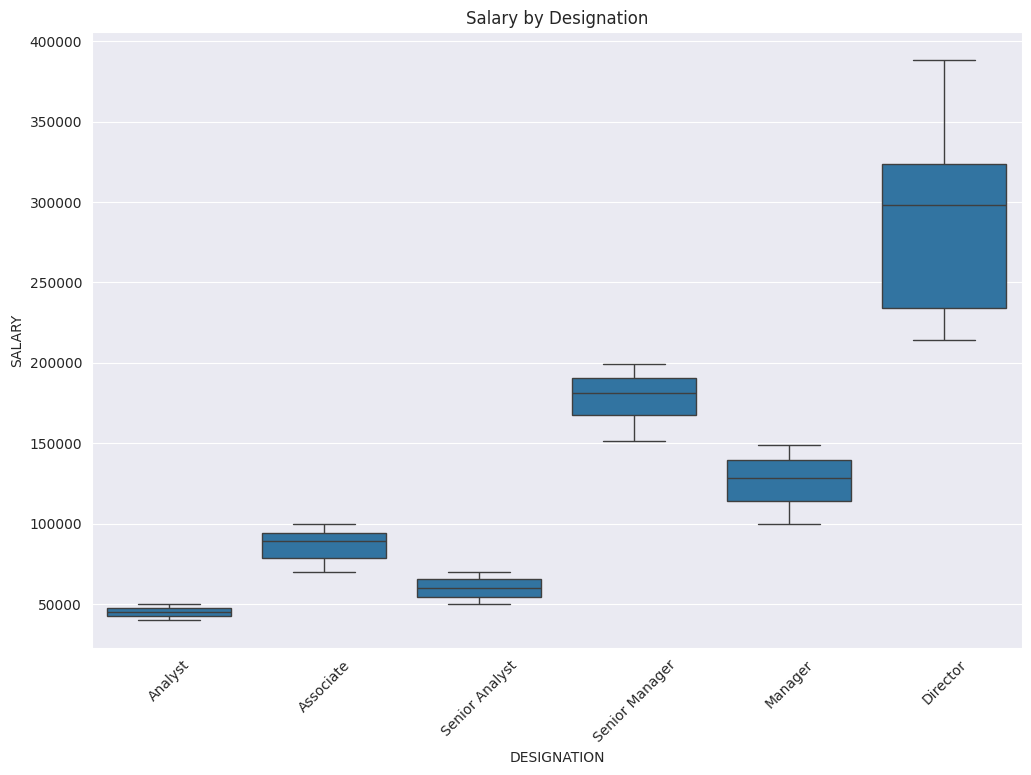

In [17]:

# Box plot of Salary by Designation
plt.figure(figsize=(12, 8))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df) # Pass the DataFrame to the 'data' parameter
plt.title('Salary by Designation')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering

In [ ]:
# Create new features from existing ones (e.g., experience squared).
df['EXP_SQUARED'] = df['PAST EXP'] ** 2

# Handling Missing Values

In [18]:
# Drop rows with missing DOJ values
df.dropna(subset=['DOJ'], inplace=True)

# Replace missing Ratings with the median or a specific value if 0 doesn't make sense
df['RATINGS'].fillna(0, inplace=True)

# Replace missing Age with mean
df['AGE'].fillna(df['AGE'].mean(), inplace=True)


/tmp/ipykernel_9933/3627917815.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATINGS'].fillna(0, inplace=True)
/tmp/ipykernel_9933/3627917815.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

# Handle Date Columns and Calculate Tenure:

In [19]:
# Convert date columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Calculate tenure in years
df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25

# Drop original date columns
df.drop(['DOJ', 'CURRENT DATE'], axis=1, inplace=True)


#  Encode categorical variables

In [20]:
# One-hot encode 'UNIT' and 'DESIGNATION' separately
df = pd.get_dummies(df, columns=['UNIT', 'DESIGNATION'], drop_first=True)


In [21]:
df.isnull().sum()

AGE                           0
SALARY                        0
RATINGS                       0
PAST EXP                      0
TENURE                        0
UNIT_IT                       0
UNIT_Management               0
UNIT_Marketing                0
UNIT_Operations               0
UNIT_Web                      0
DESIGNATION_Associate         0
DESIGNATION_Director          0
DESIGNATION_Manager           0
DESIGNATION_Senior Analyst    0
DESIGNATION_Senior Manager    0
dtype: int64

# Train-test split data

In [22]:
# Define features and target
X = df.drop('SALARY', axis=1)
y = df['SALARY']

In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling

In [24]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)


# Machine Learning Model Development and Evaluation

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}


In [26]:
predictions = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_test_scaled)

# Evaluate model performance

In [27]:
def evaluate_model(name, y_test, y_pred):
    print(f"Model: {name}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")
    print("-" * 30)

In [28]:
for name, y_pred in predictions.items():
    evaluate_model(name, y_test, y_pred)

Model: Linear Regression
Mean Absolute Error (MAE): 4296.89
Mean Squared Error (MSE): 63352402.34
Root Mean Squared Error (RMSE): 7959.42
R-squared (R2): 0.96
------------------------------
Model: Decision Tree
Mean Absolute Error (MAE): 4802.52
Mean Squared Error (MSE): 102634324.52
Root Mean Squared Error (RMSE): 10130.86
R-squared (R2): 0.93
------------------------------
Model: Random Forest
Mean Absolute Error (MAE): 4336.54
Mean Squared Error (MSE): 77463484.18
Root Mean Squared Error (RMSE): 8801.33
R-squared (R2): 0.95
------------------------------
Model: Gradient Boosting
Mean Absolute Error (MAE): 4544.06
Mean Squared Error (MSE): 83784569.34
Root Mean Squared Error (RMSE): 9153.39
R-squared (R2): 0.94
------------------------------


In [29]:
best_model_name = 'Linear Regression'


In [30]:
best_model = models[best_model_name]


In [39]:
import plotly.graph_objects as go


predictions = best_model.predict(X_test_scaled)

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=y_test, y=predictions, mode='markers'))

# Add a line for perfect correlation
fig.add_trace(go.Scatter(x=y_test, y=y_test,
                    mode='lines',
                    name='Perfect Correlation'))

# Update layout
fig.update_layout(title='Actual vs. Predicted',
                   xaxis_title='Actual',
                   yaxis_title='Predicted')

fig.show()

In [ ]:
import joblib
joblib.dump(best_model, 'best_salary_model.sav')

# ML PIPELINE

# Define preprocessing for numeric columns (scale them)

In [24]:
numeric_features = ['AGE', 'PAST EXP', 'TENURE', 'RATINGS']
numeric_transformer = StandardScaler()

# Define preprocessing for categorical features (one-hot encode them)

In [25]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [26]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [27]:
# Create a pipeline that first preprocesses the data and then applies the Linear Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [28]:
# Split the data again (repeating this step to include the preprocessor in the pipeline)
X = df.drop('SALARY', axis=1)
y = df['SALARY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['AGE', 'PAST EXP', 'TENURE',
                                                   'RATINGS']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('model', LinearRegression())])

In [ ]:
# Save the pipeline
joblib.dump(pipeline, 'salary_prediction_pipeline_lr.pkl')

In [ ]:
#evaluate the pipeline
# Load the pipeline
pipeline = joblib.load('salary_prediction_pipeline_lr.pkl')

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Evaluation metrics for the pipeline:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R-squared (R2): {r2_score(y_test, y_pred):.2f}")
